In [2]:
import os
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#%matplotlib notebook
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import cv2

## Reading csv

### Non glacier data labeling

In [3]:
nonGlaDf=pd.read_csv('NonGlacier.csv')
nonGlaDf=nonGlaDf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
nonGlaDf.insert(6,'Label',0)
print(nonGlaDf.shape)
nonGlaDf.head()

(33424, 7)


,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,0.426761,0.441653,0.464583,0.430963,0.142070,0.131931,0
1,0.300144,0.277328,0.269311,0.244660,0.107820,0.116167,0
2,0.259329,0.225632,0.209578,0.190067,0.022231,0.022334,0
3,0.281238,0.239363,0.229317,0.205514,0.022010,0.022970,0
4,0.221783,0.179304,0.169310,0.145390,0.015892,0.015494,0


### Snow ice data labeling

In [4]:
snowIceDf=pd.read_csv('SnowIce.csv')
snowIceDf=snowIceDf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
snowIceDf.insert(6,'Label',1)
print(snowIceDf.shape)
snowIceDf.head()

(25474, 7)


,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,0.696143,0.675761,0.738545,0.794304,0.237770,0.228383,1
1,0.746004,0.726731,0.804046,0.858788,0.195263,0.191771,1
2,0.988045,1.018383,1.070432,1.081058,0.178748,0.174340,1
3,0.647615,0.668565,0.718467,0.757180,0.246755,0.220243,1
4,0.507652,0.525012,0.599804,0.649483,0.278703,0.256062,1


### area not of our interest data labeling

In [5]:
values=[0]*10000
labelValue=[2]*10000
data = {'band_1': values,
        'band_2': values,
        'band_3': values,
        'band_4': values,
        'band_5': values,
        'band_6': values,
        'Label' : labelValue
        }
areaOutInt=pd.DataFrame(data)
areaOutInt.head()

,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,2
4,0,0,0,0,0,0,2


In [6]:
areaOutInt.shape

(10000, 7)

### Concatenate all dataframe into one

In [7]:
df=pd.concat([nonGlaDf,snowIceDf,areaOutInt],ignore_index=True)

In [8]:
print(df.shape)
df.head()

(68898, 7)


,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,0.426761,0.441653,0.464583,0.430963,0.142070,0.131931,0
1,0.300144,0.277328,0.269311,0.244660,0.107820,0.116167,0
2,0.259329,0.225632,0.209578,0.190067,0.022231,0.022334,0
3,0.281238,0.239363,0.229317,0.205514,0.022010,0.022970,0
4,0.221783,0.179304,0.169310,0.145390,0.015892,0.015494,0


In [9]:
y=df['Label']
y=np.array(y)
df=df.drop(['Label'],axis=1)

## Min max normilization

In [10]:
#df=(df-df.mean())/df.std()

In [11]:
#df.head()

In [12]:
X=np.array(df)
X.shape

(68898, 6)

In [13]:
X[0][:]

array([0.42676082, 0.4416533 , 0.46458304, 0.43096328, 0.14206974,
       0.13193129])

In [14]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

## Train test split

In [15]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.33,random_state=0)

## Model training

### Support vector machine

In [16]:
svmClassifier=svm.LinearSVC()
svmClassifier.fit(xTrain,yTrain)

LinearSVC()

In [17]:
yPred = svmClassifier.predict(xTest)
confusionMatrix=confusion_matrix(yTest, yPred,normalize='true')

<IPython.core.display.Javascript object>


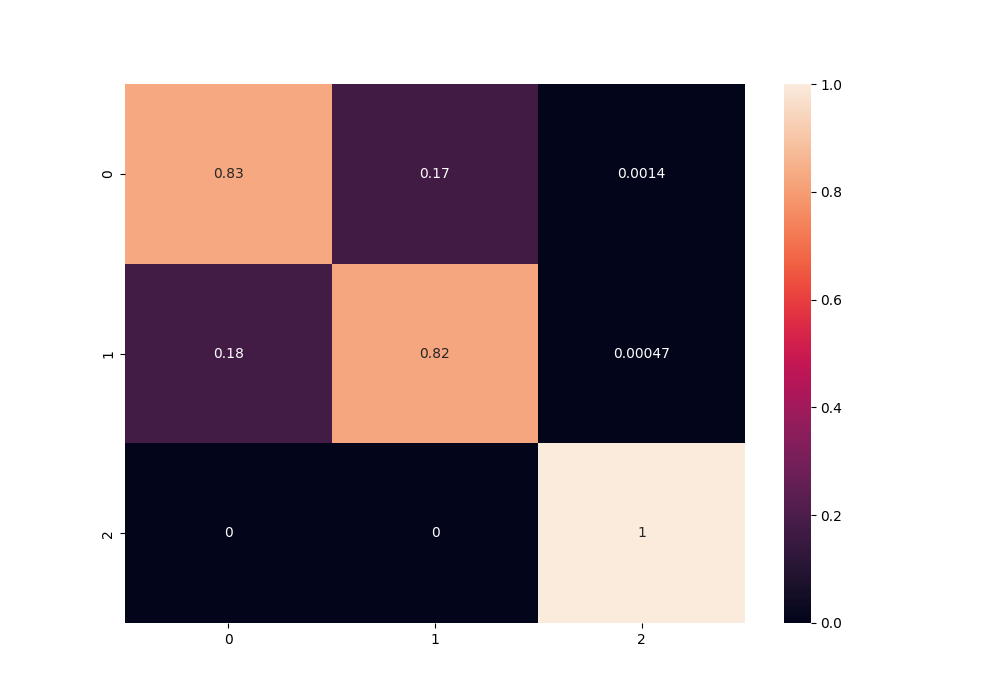

<AxesSubplot:>

In [18]:
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)

In [19]:
print(classification_report(yTest,yPred,target_names=["Non Galcier","Snow Ice","Area not of interest"]))

                      precision    recall  f1-score   support

         Non Galcier       0.86      0.83      0.84     10903
            Snow Ice       0.79      0.82      0.80      8562
Area not of interest       0.99      1.00      1.00      3272

            accuracy                           0.85     22737
           macro avg       0.88      0.88      0.88     22737
        weighted avg       0.85      0.85      0.85     22737



### Random forest

In [20]:
randClassifier=RandomForestClassifier(max_depth=10,random_state=0)
randClassifier.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, random_state=0)

In [21]:
yPred=randClassifier.predict(xTest)

In [22]:
confusionMatrix=confusion_matrix(yTest, yPred,normalize='true')

<IPython.core.display.Javascript object>


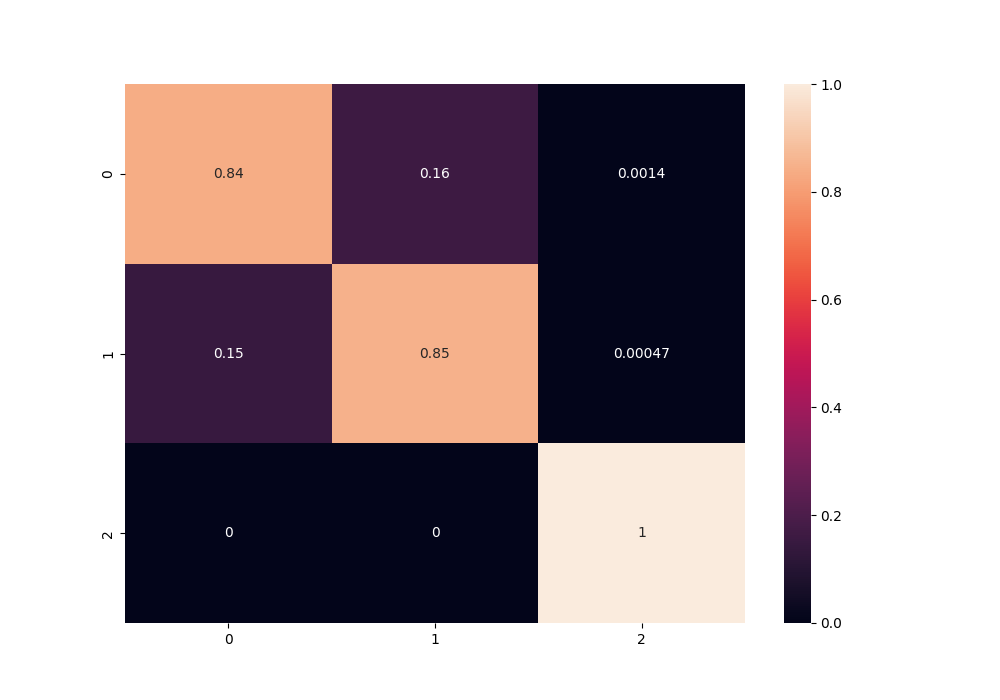

<AxesSubplot:>

In [23]:
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)

In [24]:
print(classification_report(yTest,yPred,target_names=["Non Galcier","Snow Ice","Area not of interest"]))

                      precision    recall  f1-score   support

         Non Galcier       0.88      0.84      0.86     10903
            Snow Ice       0.81      0.85      0.83      8562
Area not of interest       0.99      1.00      1.00      3272

            accuracy                           0.87     22737
           macro avg       0.89      0.90      0.89     22737
        weighted avg       0.87      0.87      0.87     22737



### Simple deep learning network

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten,Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt

In [26]:
EPOCHS=10
BATCHSIZE=512

In [27]:
model=Sequential()
model.add(Dense(20,input_dim=xTrain.shape[1],activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist=model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/10
91/91 [==============================] - 3s 10ms/step - loss: 1.0530 - accuracy: 0.4879 - val_loss: 0.9636 - val_accuracy: 0.4795
Epoch 2/10
91/91 [==============================] - 1s 8ms/step - loss: 0.9101 - accuracy: 0.6335 - val_loss: 0.8566 - val_accuracy: 0.6736
Epoch 3/10
91/91 [==============================] - 1s 9ms/step - loss: 0.8060 - accuracy: 0.6763 - val_loss: 0.7547 - val_accuracy: 0.6746
Epoch 4/10
91/91 [==============================] - 1s 9ms/step - loss: 0.7129 - accuracy: 0.6799 - val_loss: 0.6748 - val_accuracy: 0.6771
Epoch 5/10
91/91 [==============================] - 1s 9ms/step - loss: 0.6415 - accuracy: 0.6820 - val_loss: 0.6119 - val_accuracy: 0.6803
Epoch 6/10
91/91 [==============================] - 1s 8ms/step - loss: 0.5842 - accuracy: 0.6849 - val_loss: 0.5623 - val_accuracy: 0.6829
Epoch 7/10
91/91 [==============================] - 1s 8ms/step - loss: 0.5384 - accuracy: 0.6874 - val_loss: 0.5195 - val_accuracy: 0.6854
Epoch 8/10
91/91 [=

In [37]:
def plotHist():
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("accuracy deep model for LandDebriIce")
    plt.xlabel('ephocs')
    plt.ylabel('accuracy')
    plt.legend(['train','validation'])
    plt.show()

<IPython.core.display.Javascript object>


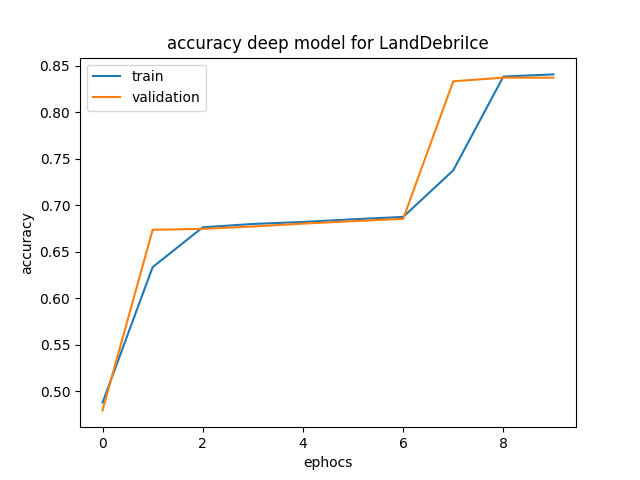

In [38]:
plotHist()

In [31]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [32]:
confusionMatix=confusion_matrix(yTest,yPred,normalize='true')
print(confusionMatix)

[[8.39585435e-01 1.59038797e-01 1.37576814e-03]
 [2.27984116e-01 7.71548704e-01 4.67180565e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


<IPython.core.display.Javascript object>


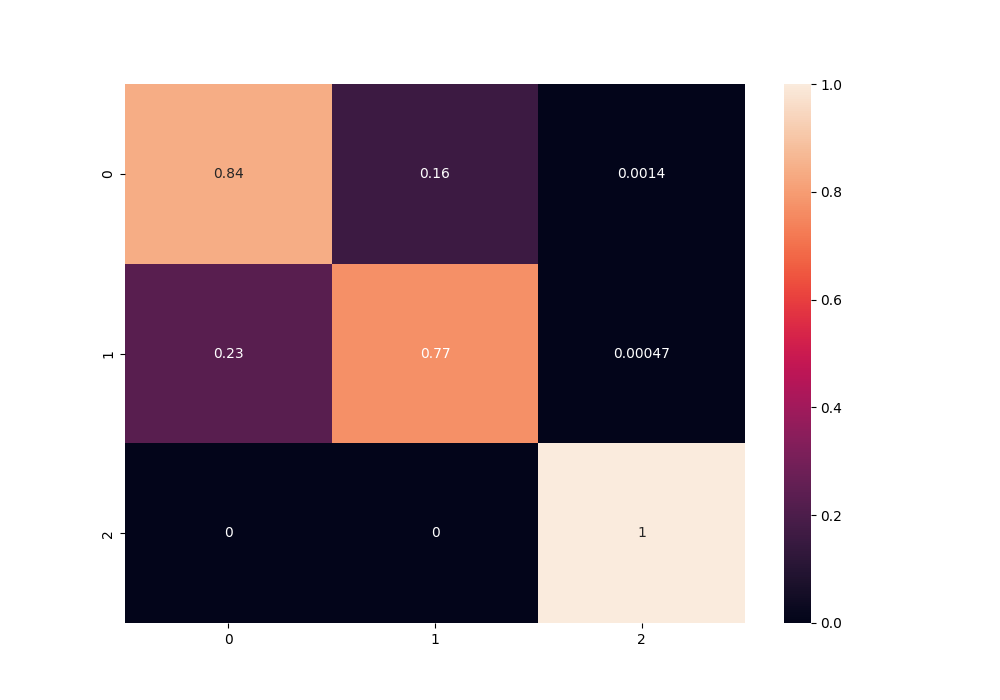

<AxesSubplot:>

In [33]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [39]:
print(classification_report(yTest,yPred,target_names=["Non Galcier","Snow Ice","Area not of interest"]))

                      precision    recall  f1-score   support

         Non Galcier       0.82      0.84      0.83     10903
            Snow Ice       0.79      0.77      0.78      8562
Area not of interest       0.99      1.00      1.00      3272

            accuracy                           0.84     22737
           macro avg       0.87      0.87      0.87     22737
        weighted avg       0.84      0.84      0.84     22737



## Reading tif

<IPython.core.display.Javascript object>


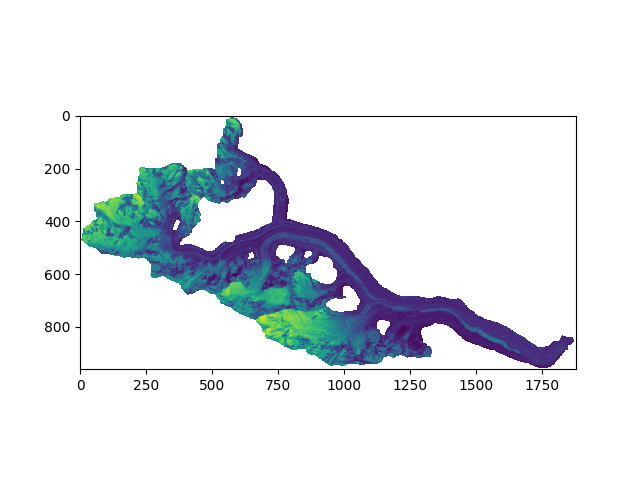

In [40]:
imgData=gdal.Open('MSI_11071 Batura.tif')
band = imgData.GetRasterBand(2)
arr = band.ReadAsArray()
plt.imshow(arr)

In [42]:
width = imgData.RasterXSize
height = imgData.RasterYSize
gt = imgData.GetGeoTransform()
gt

(437339.7085165441,
 27.007643063195015,
 0.0,
 4063892.616663075,
 0.0,
 -27.007643063195186)

<IPython.core.display.Javascript object>


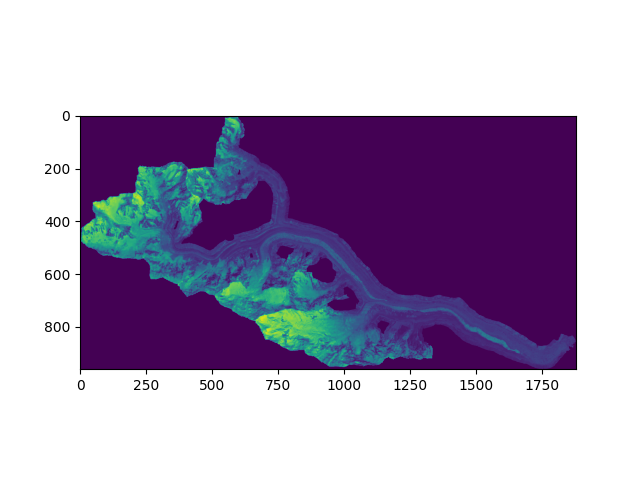

In [43]:
where_are_NaNs = np.isnan(arr)
arr[where_are_NaNs] = 0
plt.imshow(arr)

In [44]:
bandList=[]
for i in range (1,6):
    band = imgData.GetRasterBand(i)
    arr = band.ReadAsArray()
    where_are_NaNs = np.isnan(arr)
    arr[where_are_NaNs] = 0
    bandList.append(arr)

<IPython.core.display.Javascript object>


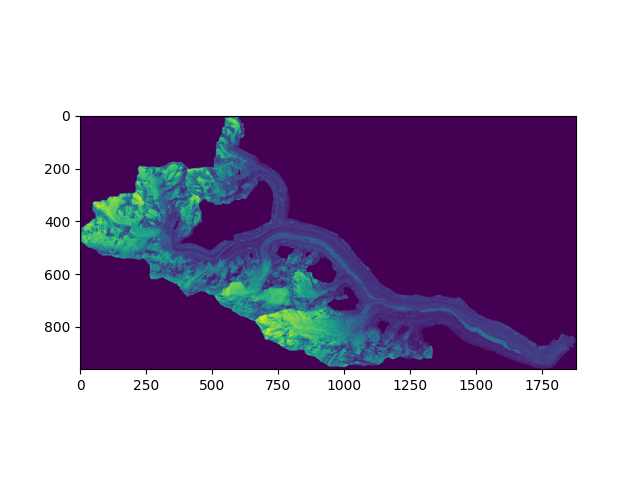

In [45]:
plt.imshow(bandList[2])

In [46]:
multiDimArray=np.zeros((arr.shape[0],arr.shape[1],6))
for i in range (1,6):
    band = imgData.GetRasterBand(i)
    arr = band.ReadAsArray()
    where_are_NaNs = np.isnan(arr)
    arr[where_are_NaNs] = 0
    multiDimArray[:,:,i-1]=arr
    

In [47]:
pixelFeature=[]
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        pixelFeature.append(list(multiDimArray[i,j,:]))

In [48]:
X=np.array(pixelFeature)

In [49]:
yPred=model.predict(np.array(X))
yPred=np.argmax(yPred,axis=1)

In [51]:
outputImg=np.array(yPred)
outputImg=outputImg.reshape((arr.shape[0],arr.shape[1]))

In [52]:
outputImg=np.where(outputImg==2,4,outputImg)
outputImg=np.where(outputImg==0,128,outputImg)
outputImg=np.where(outputImg==1,255,outputImg)

<IPython.core.display.Javascript object>


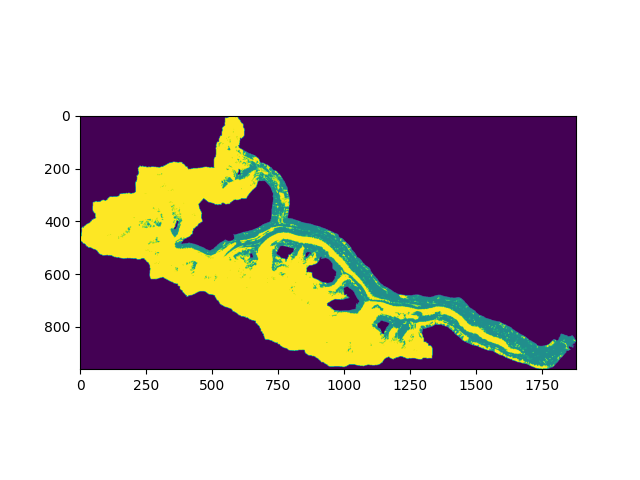

In [68]:
plt.imshow(outputImg)

In [54]:
outputImg = np.array(outputImg, dtype = np.uint8)

In [55]:
outputImg.shape

(960, 1881)

In [69]:
cv2.imshow("Output", outputImg)
cv2.setWindowProperty("Output", cv2.WND_PROP_TOPMOST, 1)
cv2.waitKey(0)


-1

In [458]:
np.unique(outputImg)

array([128, 255], dtype=uint8)

## Saving an image as tiff 

In [60]:
outputImg.shape

(960, 1881)

In [83]:
gdal.AllRegister()

file = "Batrua.tiff"
(fileRoot, fileExt) = os.path.splitext(file)
outFileName = fileRoot + "Glacier" + fileExt

imgData=gdal.Open('MSI_11071 Batura.tif')
band = imgData.GetRasterBand(1)
arr = band.ReadAsArray()
[rows, cols] = arr.shape

driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, cols, rows, 1, gdal.GDT_Byte)
outdata.SetGeoTransform(imgData.GetGeoTransform())##sets same geotransform as input
outdata.SetProjection(imgData.GetProjection())##sets same projection as input
outdata.GetRasterBand(1).WriteArray(outputImg)
outdata.GetRasterBand(1).SetNoDataValue(10000)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!
outdata = None
band=None
imgData=None

## Separate train and test csv

In [52]:
trainGdf=pd.read_csv('Training Non Glacier.csv')
trainGdf=trainGdf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
trainGdf.insert(6,'Label',0)
trainGdf.shape

(23375, 7)

In [51]:
trainSdf=pd.read_csv('Training SnowIce.csv')
trainSdf=trainSdf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
trainSdf.insert(6,'Label',1)
trainSdf.shape

(17907, 7)

In [4]:
"""values=[0]*10000
labelValue=[2]*10000
data = {'band_1': values,
        'band_2': values,
        'band_3': values,
        'band_4': values,
        'band_5': values,
        'band_6': values,
        'Label' : labelValue
        }
areaOutInt=pd.DataFrame(data)
areaOutInt.head()
"""

"values=[0]*10000\nlabelValue=[2]*10000\ndata = {'band_1': values,\n        'band_2': values,\n        'band_3': values,\n        'band_4': values,\n        'band_5': values,\n        'band_6': values,\n        'Label' : labelValue\n        }\nareaOutInt=pd.DataFrame(data)\nareaOutInt.head()\n"

In [33]:
dfTrain=pd.concat([trainGdf,trainSdf],ignore_index=True)

In [34]:
dfTrain.shape

(41282, 7)

In [35]:
yTrain=dfTrain['Label']
xTrain=dfTrain.drop(['Label'],axis=1)

In [36]:
testGdf=pd.read_csv('Test Non Glacier.csv')
testGdf=testGdf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
testGdf.insert(6,'Label',0)
testGdf.head()

,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,1.099156,1.108420,1.156681,1.113973,0.106819,0.113574,0
1,0.227828,0.179920,0.169192,0.151145,0.018902,0.019414,0
2,0.640372,0.616959,0.642547,0.624830,0.134817,0.136243,0
3,0.823264,0.838850,0.872321,0.893675,0.124537,0.129717,0
4,0.645450,0.701772,0.750256,0.736687,0.175943,0.174082,0


In [37]:
testSdf=pd.read_csv('Test SnowIce.csv')
testSdf=testSdf.drop(['Pixel-X','Pixel-Y','Longitude','Latitude'],axis=1)
testSdf.insert(6,'Label',1)
testSdf.head()

,band_1,band_2,band_3,band_4,band_5,band_6,Label
0,1.162060,1.153130,1.246060,1.222031,0.115463,0.122590,1
1,1.011173,1.026941,1.058720,1.079039,0.190793,0.199223,1
2,0.545215,0.590207,0.624635,0.623119,0.138029,0.137169,1
3,0.943841,0.941872,0.995921,0.971106,0.084170,0.087299,1
4,0.714945,0.710536,0.742205,0.725524,0.072272,0.075778,1


In [38]:
dfTest=pd.concat([testGdf,testSdf],ignore_index=True)

In [39]:
dfTest.shape

(17616, 7)

In [40]:
yTest=dfTest['Label']
xTest=dfTest.drop(['Label'],axis=1)
xTest.head()

,band_1,band_2,band_3,band_4,band_5,band_6
0,1.099156,1.108420,1.156681,1.113973,0.106819,0.113574
1,0.227828,0.179920,0.169192,0.151145,0.018902,0.019414
2,0.640372,0.616959,0.642547,0.624830,0.134817,0.136243
3,0.823264,0.838850,0.872321,0.893675,0.124537,0.129717
4,0.645450,0.701772,0.750256,0.736687,0.175943,0.174082


In [72]:
randClassifier=RandomForestClassifier(max_depth=10,random_state=0)
randClassifier.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, random_state=0)

In [73]:
xTrain.shape

(41282, 6)

In [81]:
yPred=randClassifier.predict(xTrain)

In [82]:
confusionMatrix=confusion_matrix(yTrain, yPred,normalize='true')
confusionMatrix

array([[0.8604492 , 0.1395508 ],
       [0.11302842, 0.88697158]])

<IPython.core.display.Javascript object>


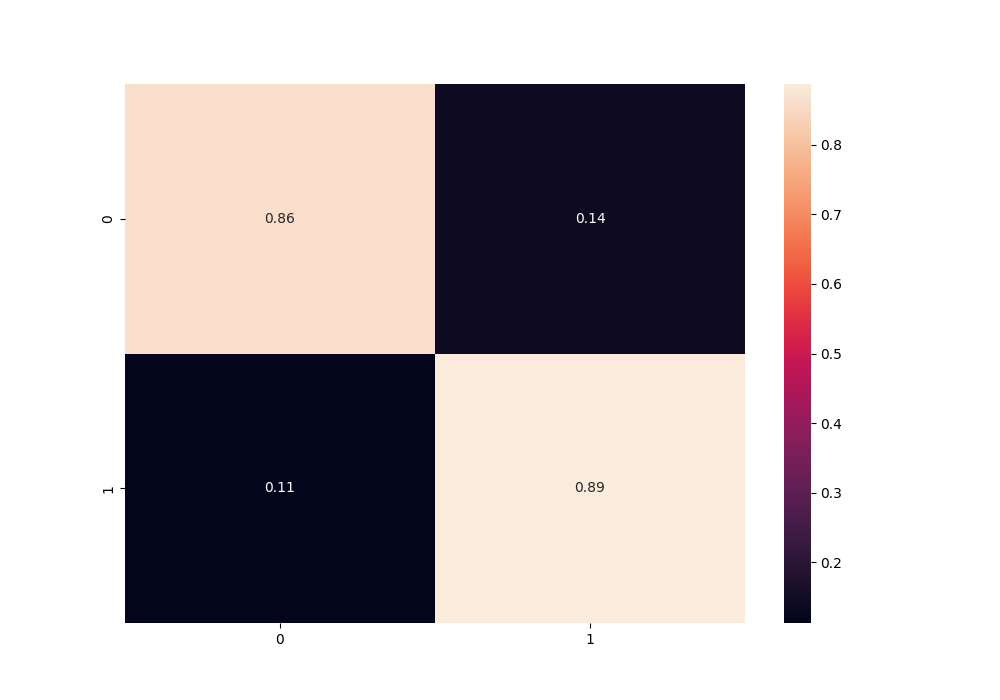

<AxesSubplot:>

In [83]:
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)

In [84]:
print(classification_report(yTrain,yPred,target_names=["Non Galcier","Snow Ice"]))

              precision    recall  f1-score   support

 Non Galcier       0.91      0.86      0.88     23375
    Snow Ice       0.83      0.89      0.86     17907

    accuracy                           0.87     41282
   macro avg       0.87      0.87      0.87     41282
weighted avg       0.87      0.87      0.87     41282



In [77]:
yPred=randClassifier.predict(xTest)
confusionMatrix=confusion_matrix(yTest, yPred,normalize='true')
confusionMatrix

array([[0.83590407, 0.16409593],
       [0.13704242, 0.86295758]])

<IPython.core.display.Javascript object>


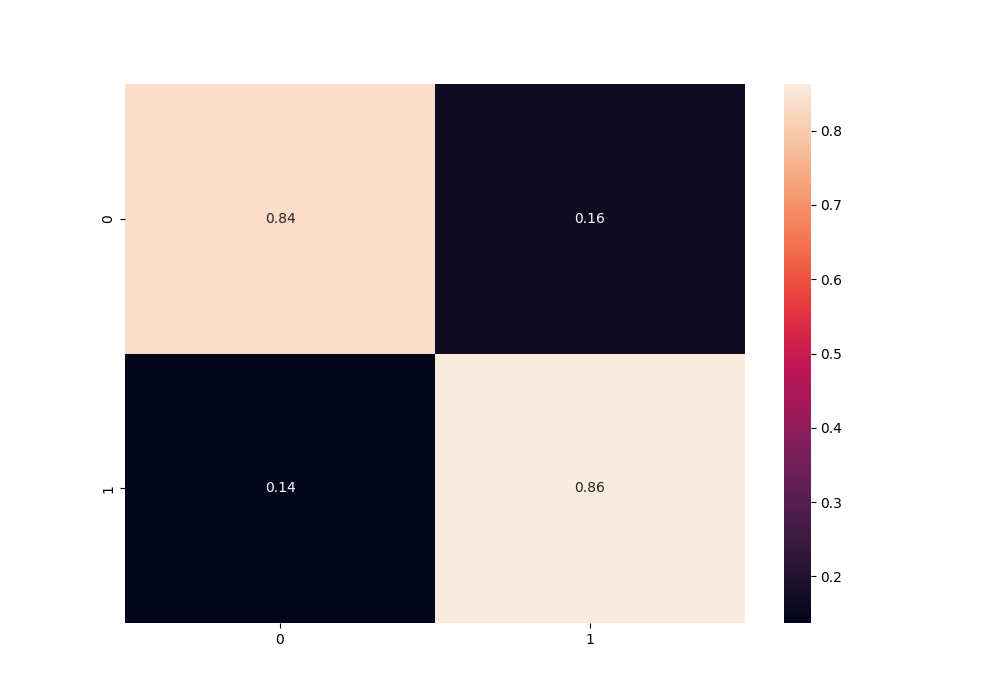

<AxesSubplot:>

In [78]:
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)

In [80]:
print(classification_report(yTest,yPred,target_names=["Non Galcier","Snow Ice"]))

              precision    recall  f1-score   support

 Non Galcier       0.89      0.84      0.86     10049
    Snow Ice       0.80      0.86      0.83      7567

    accuracy                           0.85     17616
   macro avg       0.84      0.85      0.85     17616
weighted avg       0.85      0.85      0.85     17616

